# Look at all features that go into the GBDTs for protons and non-protons

In [1]:
from notebooks_tools import *
%matplotlib inline

# load MC tracks

In [2]:
MCBNB_rec = pd.read_csv('/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/full_features_MC_BNB_AnalysisTrees.csv')
MCBNB_rec_protons = MCBNB_rec[(MCBNB_rec.MCpdgCode==2212)  & (MCBNB_rec.process_primary==1)]
MCBNB_rec_nonprotons = MCBNB_rec[MCBNB_rec.MCpdgCode!=2212]

In [3]:
print 'reconstructed events with at least one contained track:',len(MCBNB_rec.groupby(['run','subrun','event'])) 
print 'reconstructed contained tracks:',len(MCBNB_rec)
print 'reconstructed contained primary protons:',len(MCBNB_rec_protons)
print 'reconstructed contained primary protons with track > 1.5 cm:',len(MCBNB_rec_protons[MCBNB_rec_protons.length>1.5]) 

reconstructed events with at least one contained track: 206358
reconstructed contained tracks: 387789
reconstructed contained primary protons: 134019
reconstructed contained primary protons with track > 1.5 cm: 127032


# features

In [4]:
feature_names = [ 
    # geometry    
    'nhits','length','starty','startz','endy','endz','theta','phi', 'distlenratio'    
    # calorimetry    
    ,'startdqdx','enddqdx','dqdxdiff','dqdxratio','totaldqdx','averagedqdx'    
    # uboonecode tagging and PID    
    ,'cosmicscore','coscontscore','pidpida','pidchi'    
    # optical information - unused for open cosmic MC    
    ,'cfdistance'  
    #  necessary for training..
    ,'MCpdgCode' , 'truth_KE'     
]

In [5]:
def plot_protons_nonprotons_feature(var = 'theta' , x_label='$\\theta$ [deg.]' , multiply=1,
                                    bins = np.linspace(-1,181,50) ,
                                    histtype='step' , linewidth=2 ,
                                    figsize=(10,10) , legend_loc='best' , yscale=None,
                                    do_save_fig=False):

    fig,ax = plt.subplots(figsize=figsize)
    plt.hist(multiply*MCBNB_rec_protons[var] , bins=bins,histtype=histtype , linewidth=linewidth , label='protons' , normed=1);
    plt.hist(multiply*MCBNB_rec_nonprotons[var] , bins=bins,histtype=histtype , linewidth=linewidth , label='non - protons' , normed=1);
    set_axes(ax , x_label=x_label , y_label='' , fontsize=25)
    ax.legend(loc=legend_loc , fontsize=25 )
    if yscale is not None:
        ax.set_yscale(yscale)
    if do_save_fig:
        fig.savefig('/Users/erezcohen/Desktop/uBoone/analysis/GBDTs/features/protons_nonprotons_%s.pdf'%var)
    return ax

def plot_protons_nonprotons_feature_2d(varx=None ,vary=None,
                                       x_label=None,y_label=None, 
                                       mul_x=1, mul_y=1,
                                       binsx=100,binsy=100,
                                       figsize=(16,10) , legend_loc='best',
                                       do_save_fig=False):

    fig = plt.figure(figsize=figsize)
    ax=fig.add_subplot(1,2,1)
    plt.hist2d(mul_x*MCBNB_rec_protons[varx] , mul_y*MCBNB_rec_protons[vary] , bins=(binsx,binsy), label='protons' , cmap='Blues');
    set_axes(ax , x_label=x_label , y_label=y_label , fontsize=25)
    ax.set_title('protons', fontsize=25 , y=1.04)


    ax=fig.add_subplot(1,2,2)
    plt.hist2d(mul_x*MCBNB_rec_nonprotons[varx] , mul_y*MCBNB_rec_nonprotons[vary] , bins=(binsx,binsy) , label='non - protons' , cmap='Greens');
    set_axes(ax , x_label=x_label , y_label='' , fontsize=25)
    ax.yaxis.set_major_formatter( NullFormatter() )
    ax.set_title('non-protons', fontsize=25 , y=1.04)


    
    plt.subplots_adjust(wspace=0)
#     ax.legend(loc=legend_loc , fontsize=25 )
    if do_save_fig:
        fig.savefig('/Users/erezcohen/Desktop/uBoone/analysis/GBDTs/features/protons_nonprotons_%s_%s.pdf'%(varx,vary))
    return ax

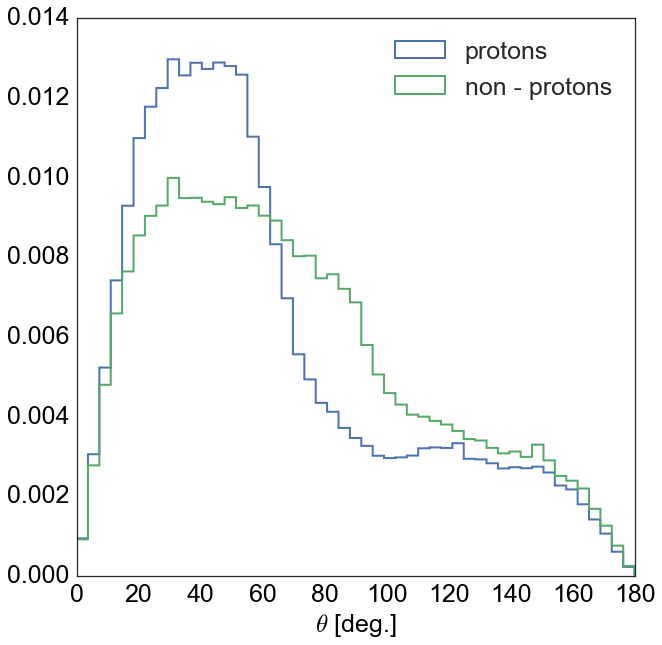

In [6]:
plot_protons_nonprotons_feature(var = 'theta' , x_label='$\\theta$ [deg.]' , multiply=180/3.1415,
                                    bins = np.linspace(0,180,50) ,
                                    histtype='step' , linewidth=2 ,
                                    figsize=(10,10) , legend_loc='best' )

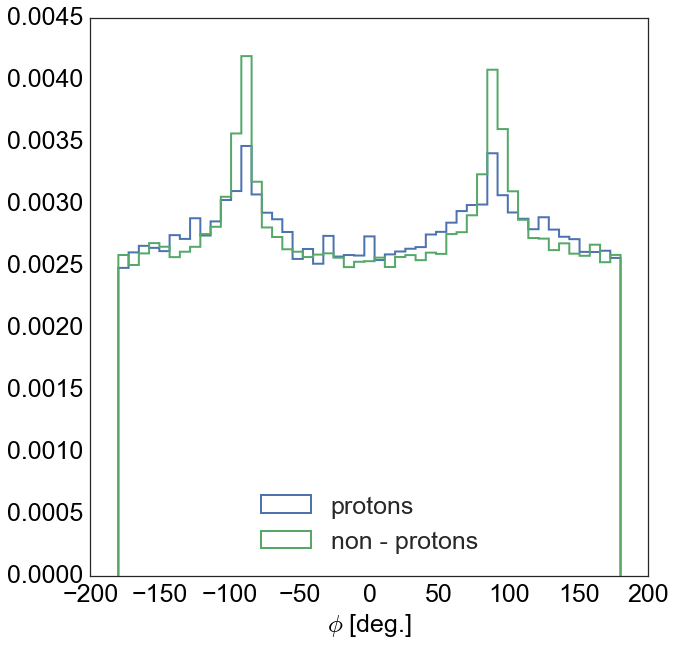

In [21]:
plot_protons_nonprotons_feature(var='phi' , x_label='$\\phi$ [deg.]' , multiply=180/3.1415, bins=np.linspace(-180,180,50) , legend_loc='lower center' )

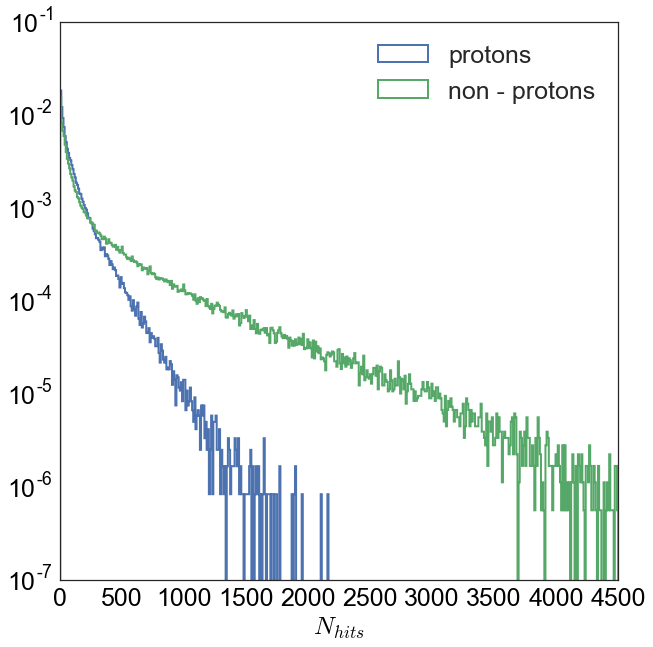

In [7]:
plot_protons_nonprotons_feature(var = 'nhits' , x_label='$N_{hits}$' , yscale='log',
                                    bins = np.linspace(0,4500,500) )

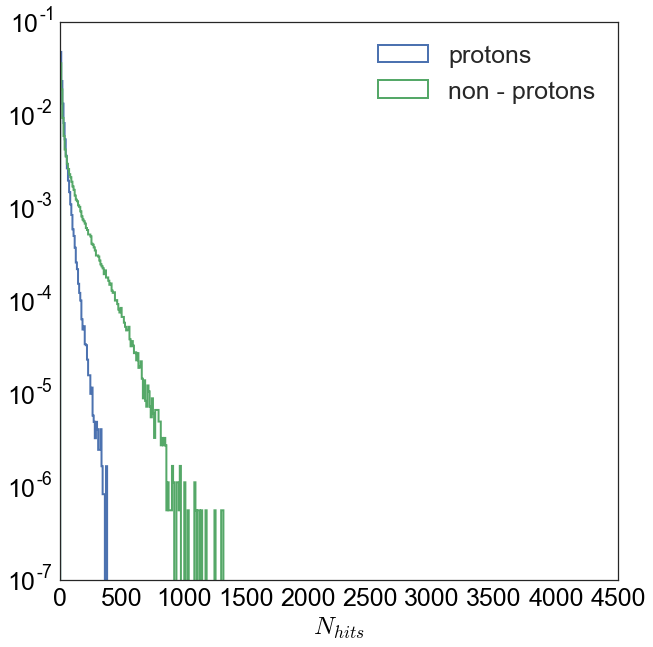

In [8]:
plot_protons_nonprotons_feature(var = 'length' , x_label='$length$' , yscale='log',
                                    bins = np.linspace(0,4500,500) )

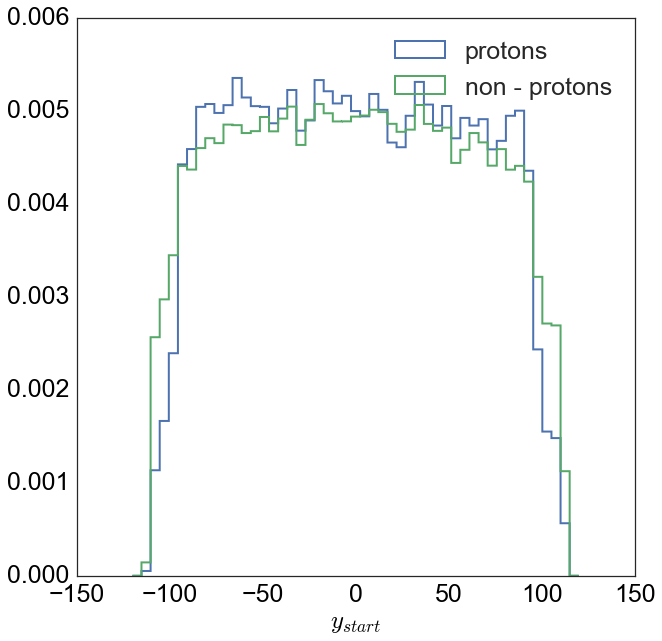

In [9]:
plot_protons_nonprotons_feature(var = 'starty' , x_label='$y_{start}$',
                                    bins = np.linspace(-120,120,50) )

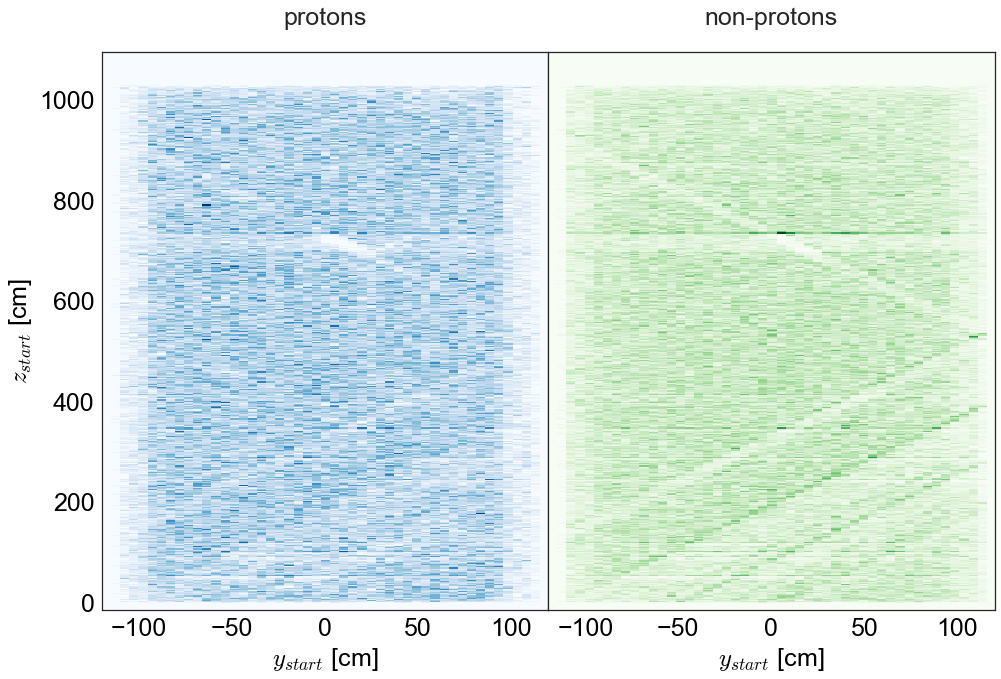

In [12]:
plot_protons_nonprotons_feature_2d(varx = 'starty' ,vary = 'startz' , 
                                   x_label='$y_{start}$ [cm]', y_label='$z_{start}$ [cm]',
                                    binsx = np.linspace(-120,120,50) , binsy = np.linspace(-10,1100,500) ,
                                   do_save_fig=False)

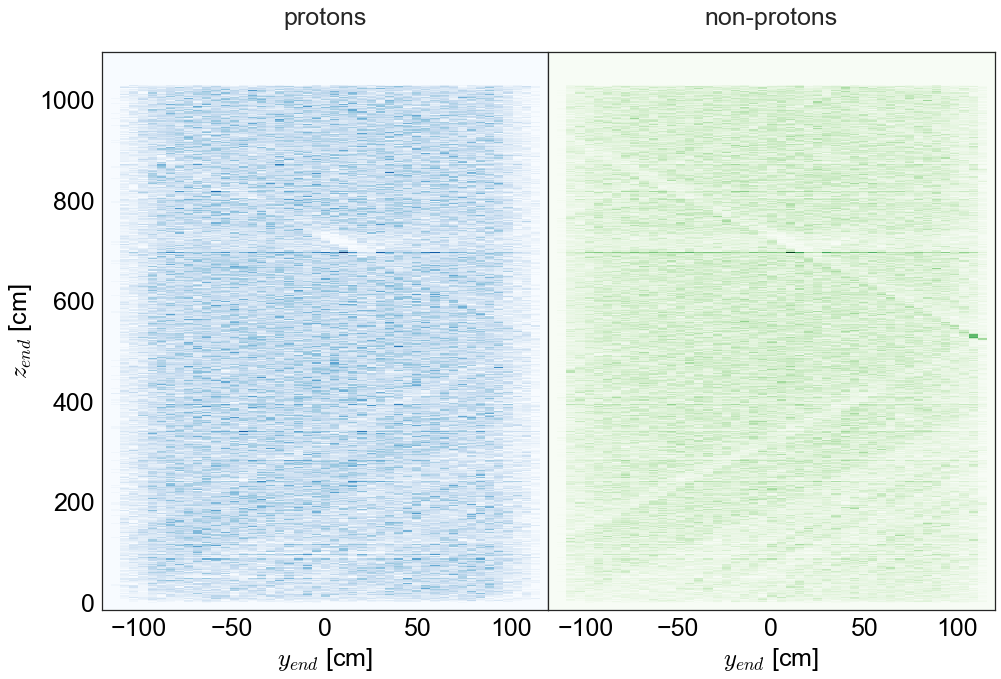

In [14]:
plot_protons_nonprotons_feature_2d(varx = 'endy' ,vary = 'endz' , 
                                   x_label='$y_{end}$ [cm]', y_label='$z_{end}$ [cm]',
                                    binsx = np.linspace(-120,120,50) , binsy = np.linspace(-10,1100,500) ,
                                   do_save_fig=False)

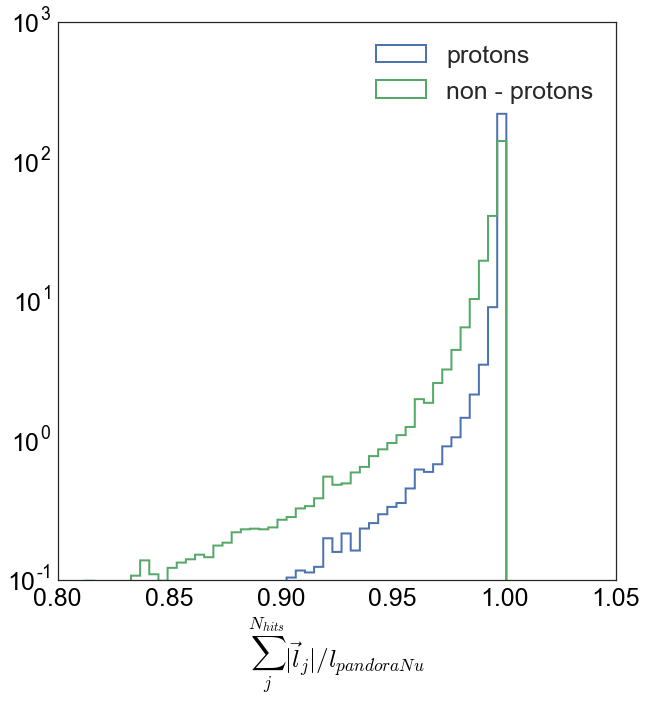

In [36]:
plot_protons_nonprotons_feature(var='distlenratio' , x_label='$\sum_j^{N_{hits}} |\\vec{l}_j|/l_{pandoraNu}$', yscale='log',
                                    bins = np.linspace(0.8,1.001,50) )


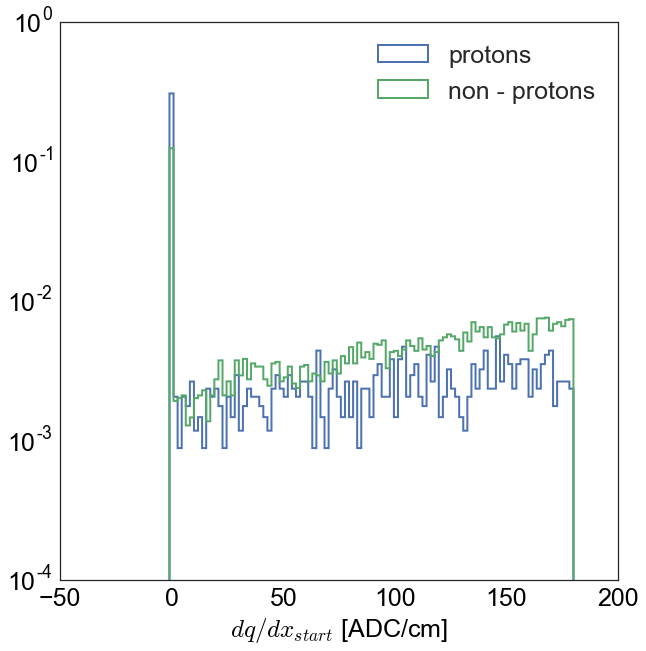

In [41]:
plot_protons_nonprotons_feature(var='startdqdx' , x_label='$dq/dx_{start}$ [ADC/cm]' , yscale='log',
                                    bins = np.linspace(-1,180,100) )


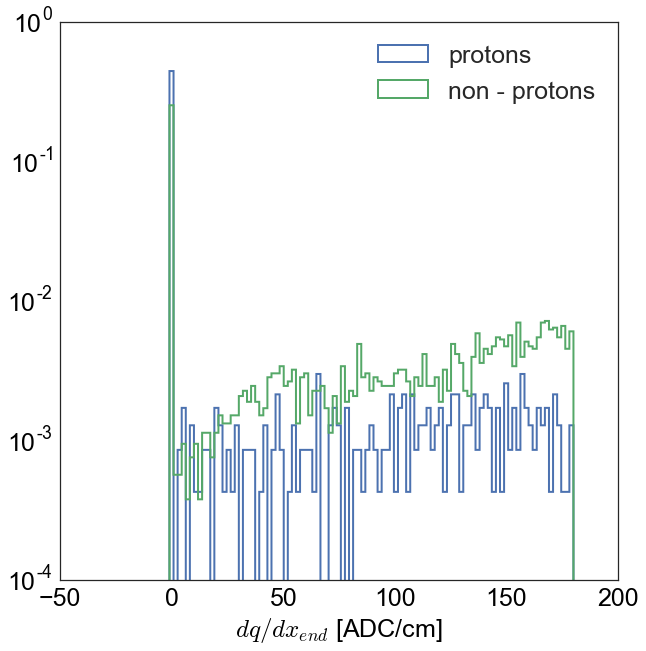

In [42]:
plot_protons_nonprotons_feature(var='enddqdx' , x_label='$dq/dx_{end}$ [ADC/cm]' , yscale='log',
                                    bins = np.linspace(-1,180,100) )


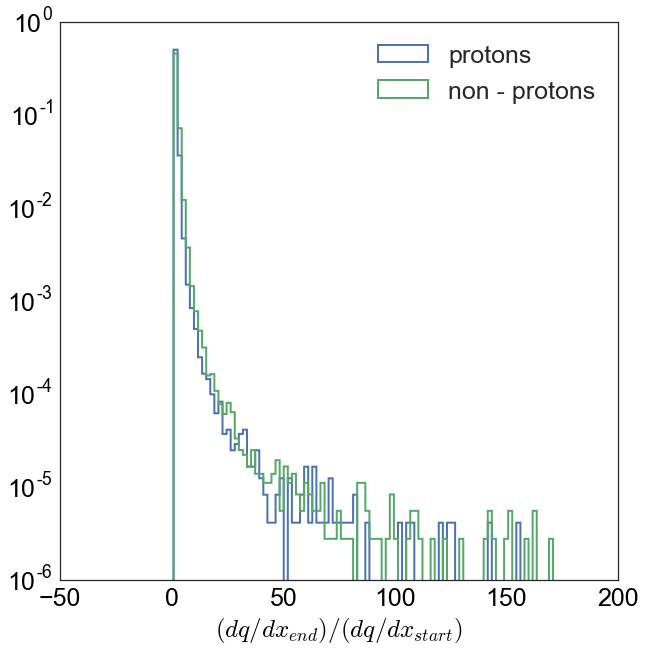

In [59]:
MCBNB_rec_protons=MCBNB_rec_protons[MCBNB_rec_protons.dqdxratio<1000]
MCBNB_rec_nonprotons=MCBNB_rec_nonprotons[MCBNB_rec_nonprotons.dqdxratio<1000]
plot_protons_nonprotons_feature(var='dqdxratio' , x_label='$(dq/dx_{end}) / (dq/dx_{start})$' , yscale='log',
                                    bins = np.linspace(-1,180,100) )

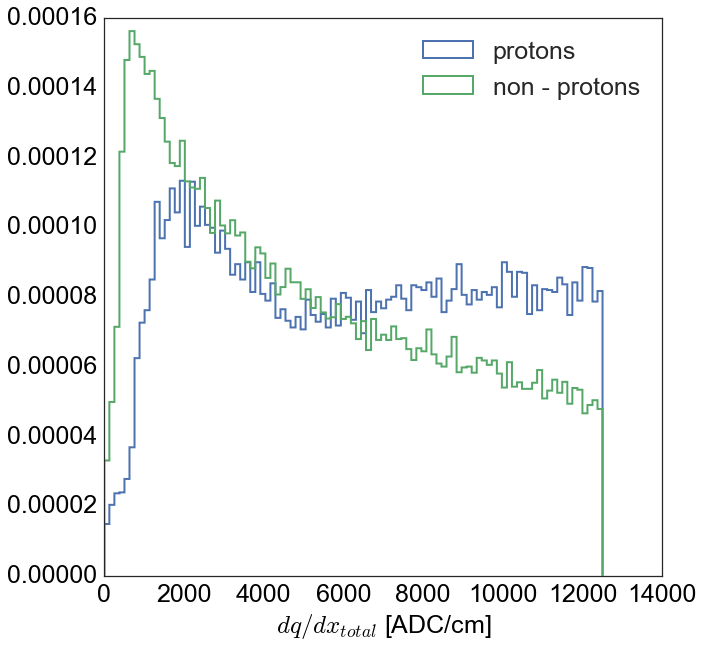

In [82]:
plot_protons_nonprotons_feature(var='totaldqdx' , x_label='$dq/dx_{total}$ [ADC/cm]' , #yscale='log',
                                    bins = np.linspace(0,12500,100) )

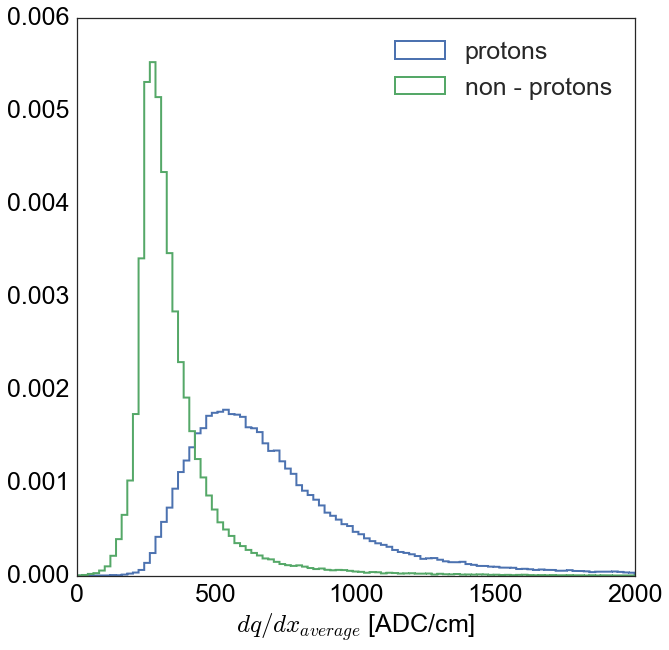

In [87]:
plot_protons_nonprotons_feature(var='averagedqdx' , x_label='$dq/dx_{average}$ [ADC/cm]' , #yscale='log',
                                    bins = np.linspace(0,2000,100) )

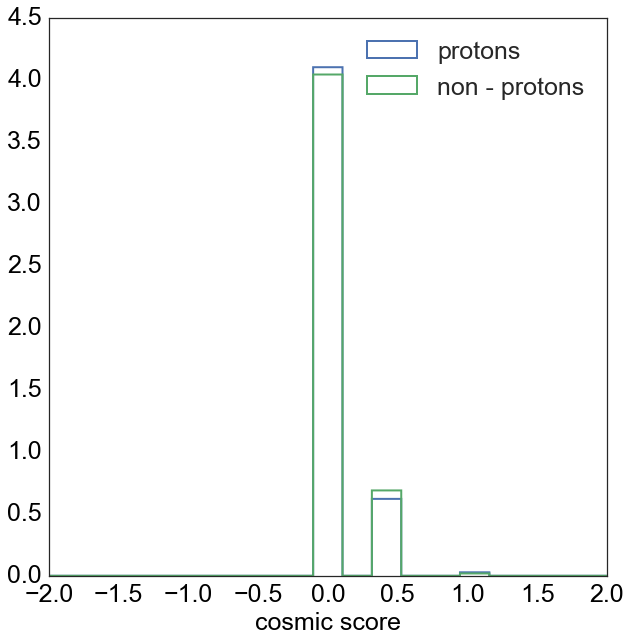

In [94]:
plot_protons_nonprotons_feature(var='cosmicscore' , x_label='cosmic score' , #yscale='log',
                                    bins = np.linspace(-2,2,20) )

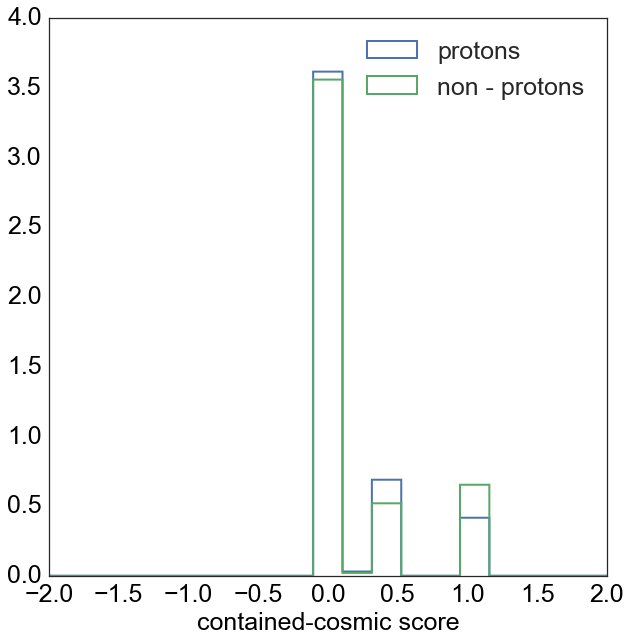

In [95]:
plot_protons_nonprotons_feature(var='coscontscore' , x_label='contained-cosmic score' , #yscale='log',
                                    bins = np.linspace(-2,2,20) )

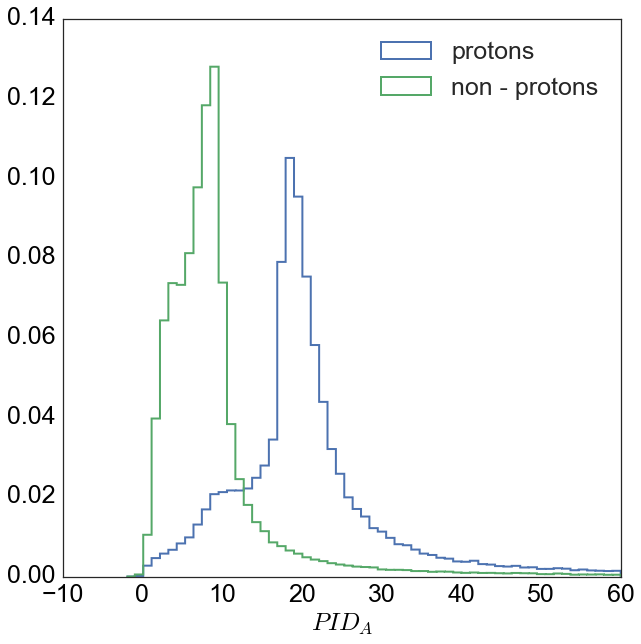

In [100]:
plot_protons_nonprotons_feature(var='pidpida' , x_label='$PID_A$' , #yscale='log',
                                    bins = np.linspace(-2,60,60) )

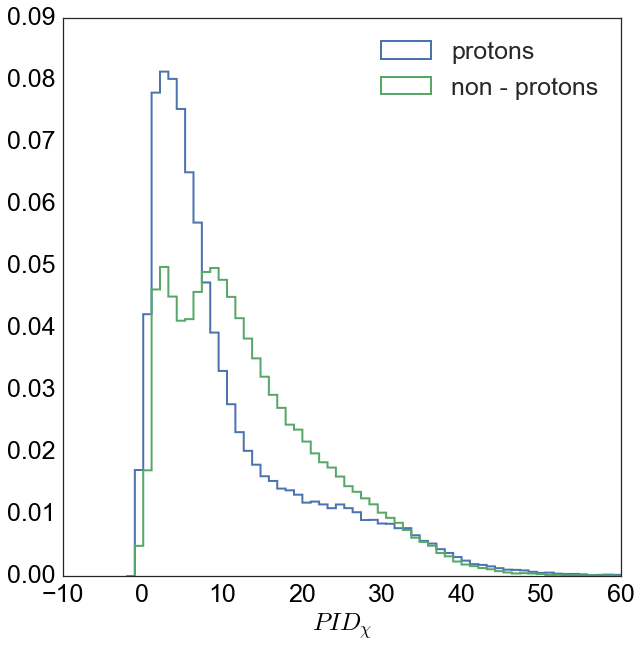

In [101]:
plot_protons_nonprotons_feature(var='pidchi' , x_label='$PID_{\\chi}$' , #yscale='log',
                                    bins = np.linspace(-2,60,60) )

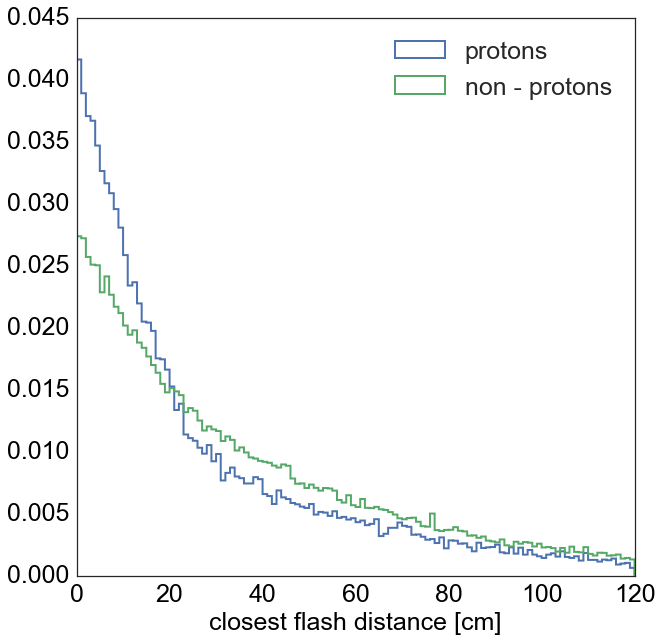

In [105]:
plot_protons_nonprotons_feature(var='cfdistance' , x_label='closest flash distance [cm]' , #yscale='log',
                                    bins = np.linspace(0,120,121) )

In [45]:
feature_names

['nhits',
 'length',
 'starty',
 'startz',
 'endy',
 'endz',
 'theta',
 'phi',
 'distlenratio',
 'startdqdx',
 'enddqdx',
 'dqdxdiff',
 'dqdxratio',
 'totaldqdx',
 'averagedqdx',
 'cosmicscore',
 'coscontscore',
 'pidpida',
 'pidchi',
 'cfdistance',
 'MCpdgCode',
 'truth_KE']